<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [4]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device="cuda" if torch.cuda.is_available() else 'cpu'
device

2.0.0+cu118


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
# Voiture
# Bio-médical
# Sécurité

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [ ]:
#C'est quand le modèle s'adapte trop au donnée d'entraînement et perd sa capacité à s'apdapter à de nouveaux exemples.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
# Ajouter des features
# Regularization
# Modifie le modèle 

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
# Done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [17]:
import torchvision
from torchvision import datasets
from torchvision import transforms

train_dataset = datasets.MNIST(root=".",
                         download=True,
                         transform=transforms.ToTensor(),
                         train=True,)

test_datset= datasets.MNIST(root=".",
                            download=True,
                            transform=transforms.ToTensor(),
                            train=False)

train_dataset, test_datset

image=train_dataset[0][0]
label=train_dataset[0][1]

train_dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

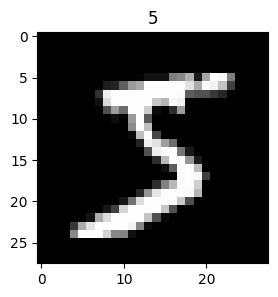

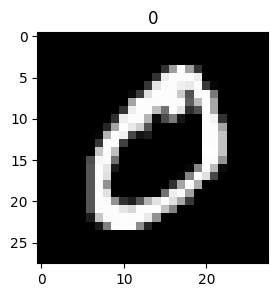

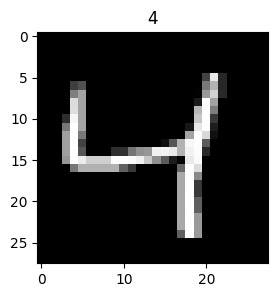

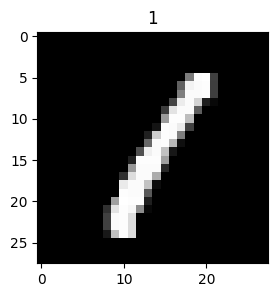

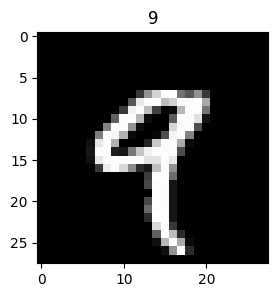

In [19]:
import matplotlib.pyplot as plt

for i in range(5):
    image=train_dataset[i][0]
    label=train_dataset[i][1]
    plt.figure(figsize=(3,3))
    plt.imshow(image.squeeze(),cmap='gray')
    plt.title(label)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [44]:
from torch.utils.data import DataLoader

train_data_loader=DataLoader(dataset=train_dataset,
                             shuffle=True,
                             batch_size=32)

test_data_loader=DataLoader(dataset=test_datset,
                            shuffle=False,
                            batch_size=32)


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [42]:
from torch import nn

class CNN(nn.Module):
    def __init__(self, hidden,input,output):
        super().__init__()

        self.block1=nn.Sequential(
            nn.Conv2d(in_channels=input,
                      out_channels=hidden,
                      kernel_size=3,
                      padding=1,
                      stride=1),

            nn.ReLU(),
            nn.Conv2d(in_channels=hidden,
                      out_channels=hidden,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.block2=nn.Sequential(
            nn.Conv2d(in_channels=hidden,
                      out_channels=hidden,
                      kernel_size=3,
                      padding=1,
                      stride=1),

            nn.ReLU(),
            nn.Conv2d(in_channels=hidden,
                      out_channels=hidden,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.classifier= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden*7*7,
                      out_features=output,
                      )
        )

    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.classifier(x)

        return x
    
model_gpu= CNN(input=1,hidden=10,output=10).to(device)
dummy = torch.rand(size=(1,28,28)).unsqueeze(0).to(device)

device

'cuda'

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [48]:
model_cpu=CNN(hidden=10,
              input=1,
              output=10).to("cpu")



In [40]:
%time

from tqdm.auto import tqdm



loss_fonction=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_cpu.parameters(),
                           lr=0.01)

epochs=5

for epoch in tqdm(range(epochs)):

    for batch, (x,y) in enumerate(train_data_loader):

        model_cpu.train()

        y_pred_train=model_cpu(x)

        loss_train=loss_fonction(y_pred_train,y)

        optimizer.zero_grad()

        loss_train.backward()

        optimizer.step()

    model_cpu.eval()
    with torch.inference_mode():
        for batch, (x,y) in enumerate(test_data_loader):
            y_pred_test=model_cpu(x)
            loss_test=loss_fonction(y_pred_test,y)

    print(f"Epoch: {epoch} | Loss: {loss_train:.3f} | Test loss: {loss_test:.3f}")
    


CPU times: total: 0 ns
Wall time: 0 ns


 20%|██        | 1/5 [00:38<02:34, 38.72s/it]

Epoch: 0 | Loss: 0.040 | Test loss: 0.148


 40%|████      | 2/5 [01:19<01:59, 39.74s/it]

Epoch: 1 | Loss: 0.081 | Test loss: 0.013


 60%|██████    | 3/5 [02:00<01:20, 40.27s/it]

Epoch: 2 | Loss: 0.085 | Test loss: 0.002


 80%|████████  | 4/5 [02:41<00:40, 40.88s/it]

Epoch: 3 | Loss: 0.026 | Test loss: 0.005


100%|██████████| 5/5 [03:22<00:00, 40.51s/it]

Epoch: 4 | Loss: 0.239 | Test loss: 0.013


In [51]:
%time

from tqdm.auto import tqdm

model_gpu=CNN(hidden=10,
              input=1,
              output=10).to(device)


loss_fonction=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_gpu.parameters(),
                           lr=0.01)

epochs=5

for epoch in tqdm(range(epochs)):

    for batch, (x,y) in enumerate(train_data_loader):
        
        x,y=x.to(device),y.to(device)
        model_gpu.train()

        y_pred_train=model_gpu(x)

        loss_train=loss_fonction(y_pred_train,y)

        optimizer.zero_grad()

        loss_train.backward()

        optimizer.step()

    model_gpu.eval()
    with torch.inference_mode():
        for batch, (x,y) in enumerate(test_data_loader):
            x,y=x.to(device),y.to(device)
            y_pred_test=model_gpu(x)
            loss_test=loss_fonction(y_pred_test,y)

    print(f"Epoch: {epoch} | Loss: {loss_train:.3f} | Test loss: {loss_test:.3f}")

CPU times: total: 0 ns
Wall time: 0 ns


 20%|██        | 1/5 [00:14<00:57, 14.40s/it]

Epoch: 0 | Loss: 0.038 | Test loss: 0.001


 40%|████      | 2/5 [00:28<00:42, 14.26s/it]

Epoch: 1 | Loss: 0.058 | Test loss: 0.004


 60%|██████    | 3/5 [00:43<00:29, 14.60s/it]

Epoch: 2 | Loss: 0.142 | Test loss: 0.001


 80%|████████  | 4/5 [00:57<00:14, 14.45s/it]

Epoch: 3 | Loss: 0.355 | Test loss: 0.000


100%|██████████| 5/5 [01:12<00:00, 14.45s/it]

Epoch: 4 | Loss: 0.044 | Test loss: 0.003


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

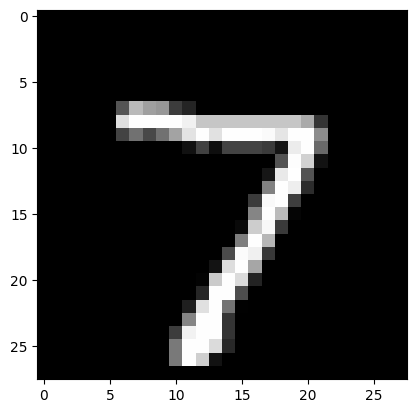

In [56]:
plt.imshow(test_datset[0][0].squeeze(), cmap="gray")

In [62]:
model_pred=model_gpu(test_datset[0][0].unsqueeze(0).to(device))
model_pred=torch.softmax(model_pred,dim=1).argmax(dim=1)
model_pred

tensor([7], device='cuda:0')

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

0.22.0


313it [00:01, 192.26it/s]


(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

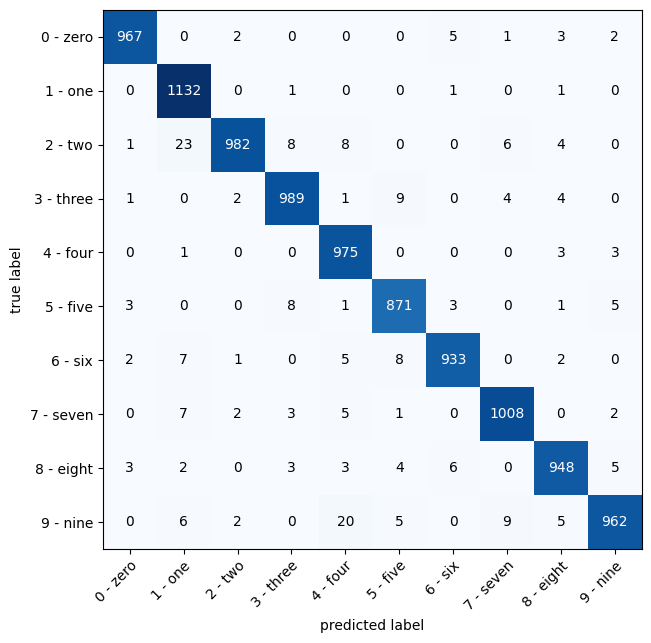

In [68]:
import mlxtend 

print(mlxtend.__version__)

model_gpu.eval()
from tqdm.auto import tqdm


model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_data_loader)):

    X, y = X.to(device), y.to(device)

    y_pred_logits = model_gpu(X)

    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)

    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(train_dataset.classes))
confmat_tensor = confmat(preds=y_preds,
                         target=test_datset.targets)


plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=train_dataset.classes,
    figsize=(10, 7))


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?